<a href="https://colab.research.google.com/github/habib-153/AI-ML/blob/main/module_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
#sklearn preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#Regression model

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.ensemble import VotingRegressor, StackingRegressor


#metrices

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
uploaded = files.upload()
df = pd.read_csv('bangladesh_student_performance.csv')
df.head()

Saving bangladesh_student_performance.csv to bangladesh_student_performance.csv


,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94


In [ ]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Bangladesh Student performance prediction', explorative = True)

profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 45.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
len(df.columns)

16

In [5]:
df.columns= [
    'date','st_gender','st_age','st_address',
    'st_fam_size','pstatus','m_edu','f_edu',
    'm_job','f_job','st_relationship',
    'smoker','tuition_fee','time_with_friends',
    'ssc_result','hsc_result'
]

In [6]:
if 'date' in df.columns:
  df.drop( columns = ['date'], inplace=True )

In [7]:
df.columns.size

15

In [8]:
df.shape

(2018, 15)

In [9]:
corr_target = df.select_dtypes(include=np.number).corr()['hsc_result'].sort_values(ascending=False)
print(corr_target)

hsc_result           1.000000
ssc_result           0.950178
m_edu                0.063776
f_edu                0.054811
tuition_fee          0.038068
st_age              -0.009857
time_with_friends   -0.156356
Name: hsc_result, dtype: float64


# Scale X And Y

In [10]:
X = df.drop('hsc_result', axis=1)
y = df['hsc_result']

#Numerical Column and Categorical Columns

In [11]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

print(f"Numerical Feature : {numerical_features}")
print(f"Categorical Feature : {categorical_features}")

Numerical Feature : Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')
Categorical Feature : Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object')


#pipeline

In [12]:
num_tranformer = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [13]:
# Categorical
cat_tranformer = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_tranformer,numerical_features),
        ('cat',cat_tranformer,categorical_features)
    ]
    )

# Ensemble - boosting, stacking

In [16]:
#base learner
reg_lr = LinearRegression()
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [17]:
#Voting regressor
voting_reg = VotingRegressor(
    estimators=[
        ('lr', reg_lr),
        ('rf', reg_rf),
        ('gb', reg_gb)
    ]
)

In [18]:
#stacking

stacking_reg = StackingRegressor(
    estimators= [
        ('rf',reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge() #the meta learner
)

#Model Training

In [19]:
model_to_train = {
    'Linear Regression': reg_lr,
    'Random Forest': reg_rf,
    'Gradient Boosting': reg_gb,
    'Voting Regressor': voting_reg,
    'Stacking Regressor': stacking_reg
}

In [20]:
#evaluation
results = []

for model_name, model in model_to_train.items():
  pipeline = Pipeline(
      [
  ('preprocessor', preprocessor),
  ('model', model)
      ]
  )

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  results.append({
      'Model': model_name,
      'MAE': mae,
      'RMSE': rmse,
      'R2 Score': r2
  })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

                Model       MAE      RMSE  R2 Score
4  Stacking Regressor  0.097738  0.122315  0.960094
2   Gradient Boosting  0.097982  0.122703  0.959840
3    Voting Regressor  0.098811  0.123997  0.958989
1       Random Forest  0.105572  0.131990  0.953531
0   Linear Regression  0.110812  0.141443  0.946636


#Vizualization

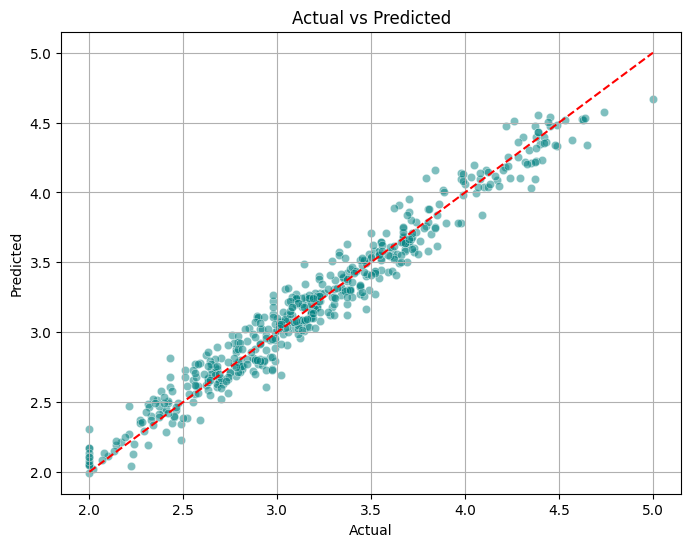

In [21]:
best_model = model_to_train[results_df.iloc[0]['Model']]
# print(best_model)

final_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', best_model)
    ]
)

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

#plot Actual vs predicted
plt.figure( figsize = (8,6) )
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')
plt.plot([2,5], [2,5], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

#Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

rf_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

#5 fold cv
scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

rmse = np.sqrt(-scores)
print(f"RMSE: {rmse}")
print(rmse.mean())

RMSE: [0.1367073  0.14959885 0.14946362 0.14044709 0.13028209]
0.1412997890715635


In [24]:
# stacking cv
stacking_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', stacking_reg)
    ]
)

#5 fold cv
st_scores = cross_val_score(stacking_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

rmse = np.sqrt(-st_scores)
print(f"RMSE: {rmse}")
print(rmse.mean())

RMSE: [0.12822221 0.13851538 0.13330366 0.12965989 0.1177142 ]
0.12948306988573377


#Grid Search CV

In [25]:
from sklearn.model_selection import GridSearchCV
rf_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

#define the grid

param_grid = {
    'model__n_estimators' : [100,200] ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : [2,5]
}

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=5, scoring = 'neg_root_mean_squared_error', n_jobs=-1, verbose=2)

In [26]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [28]:
print(grid_search.best_params_)
print(-grid_search.best_score_)

{'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 200}
0.14029430763613732


#Randomized Search Cv

In [32]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

my_dist = randint(1,10)

print(my_dist.rvs(size=20))

[6 9 3 9 9 5 5 2 7 1 9 7 4 5 1 5 9 4 9 8]


In [33]:
param_dist = {
    'model__n_estimators' : randint(100,500) ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : randint(1,10)
}

random_search = RandomizedSearchCV(estimator=rf_pipeline, param_distributions=param_dist, n_iter=50, cv=5, scoring = 'neg_root_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy=...
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__max_depth': [None, 10, 20],
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a6ceeea7ce0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a6ceee557f0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [34]:
print(random_search.best_params_)
print(-random_search.best_score_)

{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 364}
0.13989915312685103


#Save model


In [36]:
import pickle
from sklearn.linear_model import LinearRegression

X_train_lr = [ [1],[2],[3],[4],[5] ]  #study
y_train_lr = [10,20,30,40,50] #marks

model = LinearRegression()

model.fit(X_train_lr,y_train_lr)

model.predict( [ [6] ] )[0]

np.float64(59.99999999999999)

In [37]:
filename = "model.pkl"

with open( filename, "wb" ) as file:
  pickle.dump( model, file )

In [38]:
#load

with open( "/content/model.pkl", "rb" ) as file:
  loaded_model = pickle.load(file)
loaded_model.predict( [[7 ]] )

array([70.])

In [39]:
filename = "random_forest.pkl"

with open( filename, "wb" ) as file:
  pickle.dump( random_search, file )

In [41]:
#load

with open( "/content/random_forest.pkl", "rb" ) as file:
  rf_model = pickle.load(file)

In [42]:
rf_model.predict(X_test)

array([3.2503022 , 3.61401099, 3.67206044, 3.84637363, 4.12892857,
       3.28983516, 4.08752747, 2.51857143, 2.09409341, 3.28085165,
       3.57673077, 2.92299451, 3.19612637, 4.44568681, 3.02269231,
       2.65895604, 3.60664835, 3.31626374, 2.88554945, 2.87321429,
       2.76582418, 3.20049451, 2.90384615, 3.22901099, 2.05730769,
       2.67673077, 3.20247253, 3.97478022, 3.12392857, 4.04013736,
       2.49717033, 3.84826923, 4.50901099, 2.57065934, 3.19376374,
       3.20703297, 2.74739011, 3.57582418, 2.46085165, 2.61054945,
       3.01063187, 2.96162088, 3.64508242, 2.77881868, 2.28978022,
       2.99010989, 2.62478022, 2.73450549, 4.12958791, 3.21994505,
       2.96991758, 3.40620879, 4.27532967, 3.51211538, 2.96260989,
       3.23824176, 3.28063187, 2.78914835, 3.70107143, 2.7543956 ,
       3.05950549, 2.65843407, 2.51403846, 4.46708791, 2.5871978 ,
       3.21717033, 3.84601648, 2.74203297, 3.06846154, 3.26313187,
       2.99895604, 2.63681319, 2.70464286, 3.44107143, 3.06126

#RF using MLFLOW

In [43]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.1 MB/s eta 0:00:00


In [49]:
mlflow.set_tracking_uri("file:///content/mlruns")


In [50]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

mlflow.set_experiment("Student Performence Using Rf")

my_params = {
    'n_estimators' : 100,
    'max_depth': 10,
    'random_state': 42
}

simple_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(**my_params))
])

with mlflow.start_run():
  mlflow.log_params(my_params)

  mlflow.log_param("model_type", "RandomForestResressor")

  #train
  simple_rf_pipeline.fit(X_train, y_train)

  y_train_pred = simple_rf_pipeline.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

  #log train details
  mlflow.log_metric("train_rmse", train_rmse)

  #test
  y_test_pred = simple_rf_pipeline.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

  mlflow.log_metric("test_rmse", test_rmse)


test_rmse


2026/01/16 12:33:01 INFO mlflow.tracking.fluent: Experiment with name 'Student Performence Using Rf' does not exist. Creating a new experiment.


np.float64(0.13223353982151242)